In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('DRUGS SIDE EFFECTS.csv')
data.head(10)

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
5,Aabida,F,valtrex,55.0,"Hispanic, White",No Side Effects
6,Aabidah,F,levoxyl,34.0,White,No Side Effects
7,Aabigail,F,imitrex,28.0,White,Moderate Side Effects
8,Aabir,M,seroquel,38.0,White,Mild Side Effects
9,Aabir,M,minocycline,56.0,White,No Side Effects


## **Exploratory Data Analysis**

In [ ]:
# Check for rows with all the features having the same values
same_values_rows = data[data.duplicated(keep=False) & data.apply(lambda x: x.nunique() == 1, axis=1)]

# Print the rows with all the features having the same values
print("Rows with Same Values in All Features:")
print(same_values_rows)

Rows with Same Values in All Features:
Empty DataFrame
Columns: [NAME, GENDER, DRUG NAME, AGE, RACE, SIDE EFFECTS]
Index: []


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [ ]:
data.shape

(400000, 6)

In [ ]:
data.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [ ]:
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [ ]:
data.nunique()

NAME            133911
GENDER               2
DRUG NAME          502
AGE                 80
RACE                 9
SIDE EFFECTS         5
dtype: int64

<Axes: ylabel='count'>

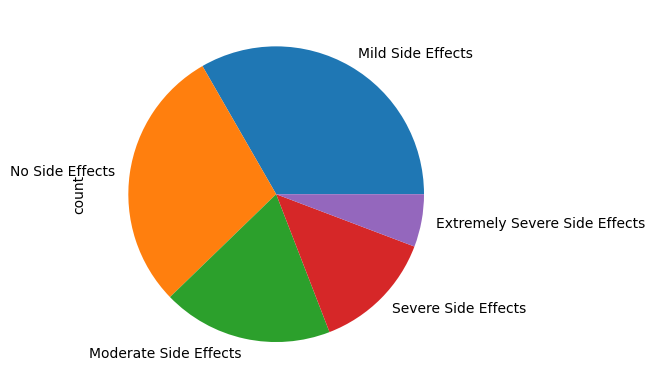

In [ ]:
data['SIDE EFFECTS'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

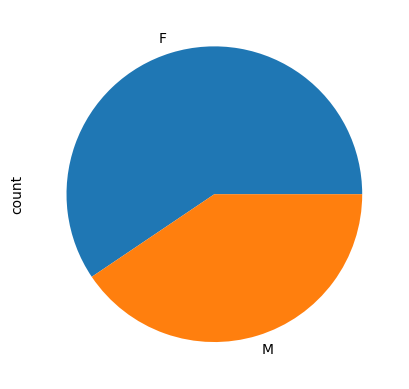

In [ ]:
data['GENDER'].value_counts().plot(kind='pie')

# **Visualization**

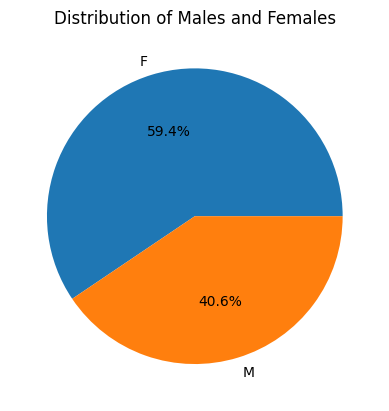

In [ ]:
gender_counts = data['GENDER'].value_counts()

# Create a pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Males and Females')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

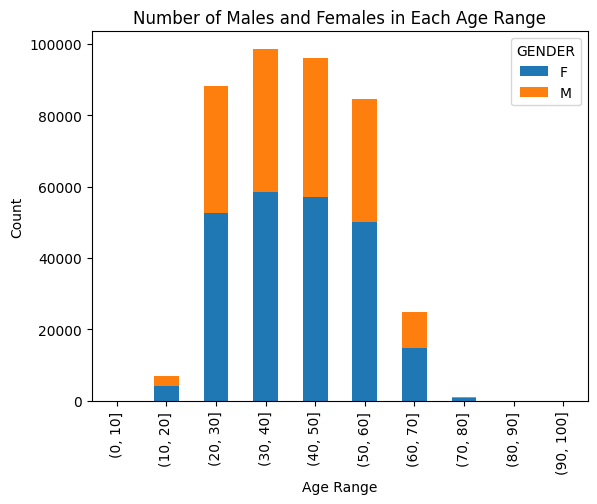

In [ ]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Categorize the ages into the defined ranges
data['Age Range'] = pd.cut(data['AGE'], bins=age_ranges)

# Group the data by age range and gender, and count the number of occurrences
grouped_data = data.groupby(['Age Range', 'GENDER']).size().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of Males and Females in Each Age Range')

# Display the plot
plt.show()

In [ ]:
data['Age Range'] = pd.cut(data['AGE'], bins=age_ranges).astype(str)

# Group the data by age range and gender, and count the number of occurrences
grouped_data = data.groupby(['Age Range', 'GENDER']).size().unstack()

# Create a stacked bar plot using Plotly
fig = go.Figure()

# Add bars for males and females in each age range
for col in grouped_data.columns:
    fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data[col], name=col,
                         text=grouped_data[col], textposition='auto'))

# Update the layout of the figure
fig.update_layout(barmode='stack', xaxis_title='Age Range', yaxis_title='Count',
                  title='Number of Males and Females in Each Age Range')

# Display the plot
fig.show()

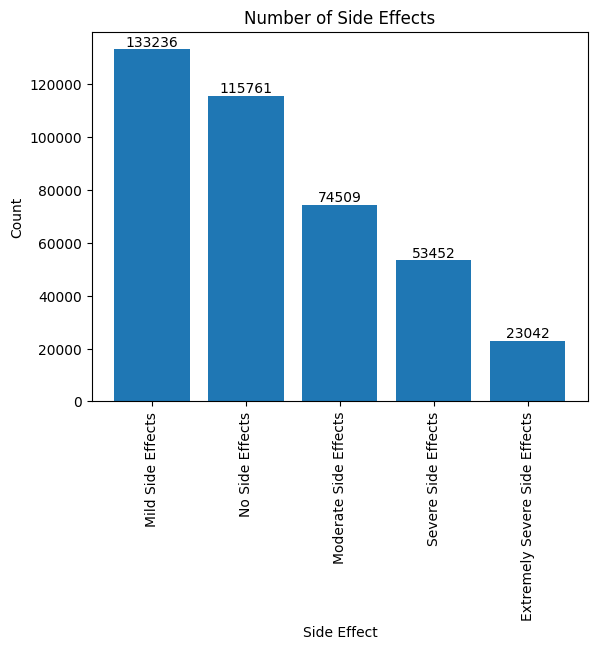

In [ ]:
side_effect_counts = data['SIDE EFFECTS'].value_counts()
plt.bar(side_effect_counts.index, side_effect_counts.values)

# Add labels and title
plt.xlabel('Side Effect')
plt.ylabel('Count')
plt.title('Number of Side Effects')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Add number labels on top of each bar
for i, v in enumerate(side_effect_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
race_counts = data['RACE'].value_counts()
fig = go.Figure(data=[go.Bar(x=race_counts.index, y=race_counts.values,
                            text=race_counts.values, textposition='auto')])

# Add labels and title
fig.update_layout(xaxis_title='Race', yaxis_title='Count', title='Number of People by Race')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

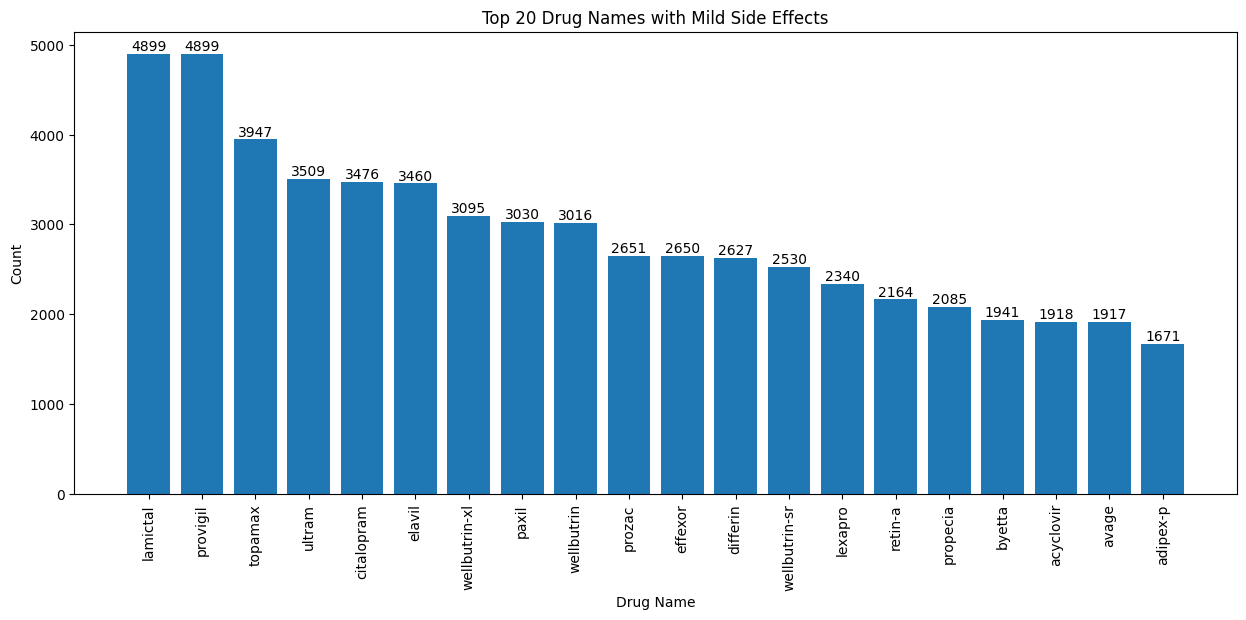

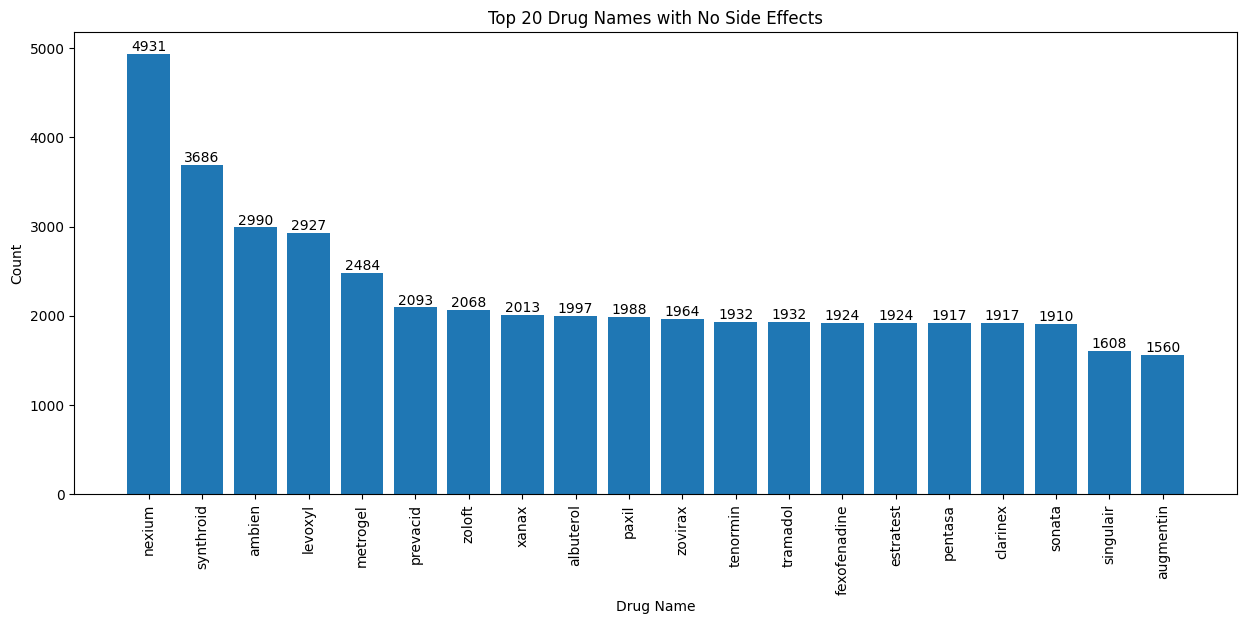

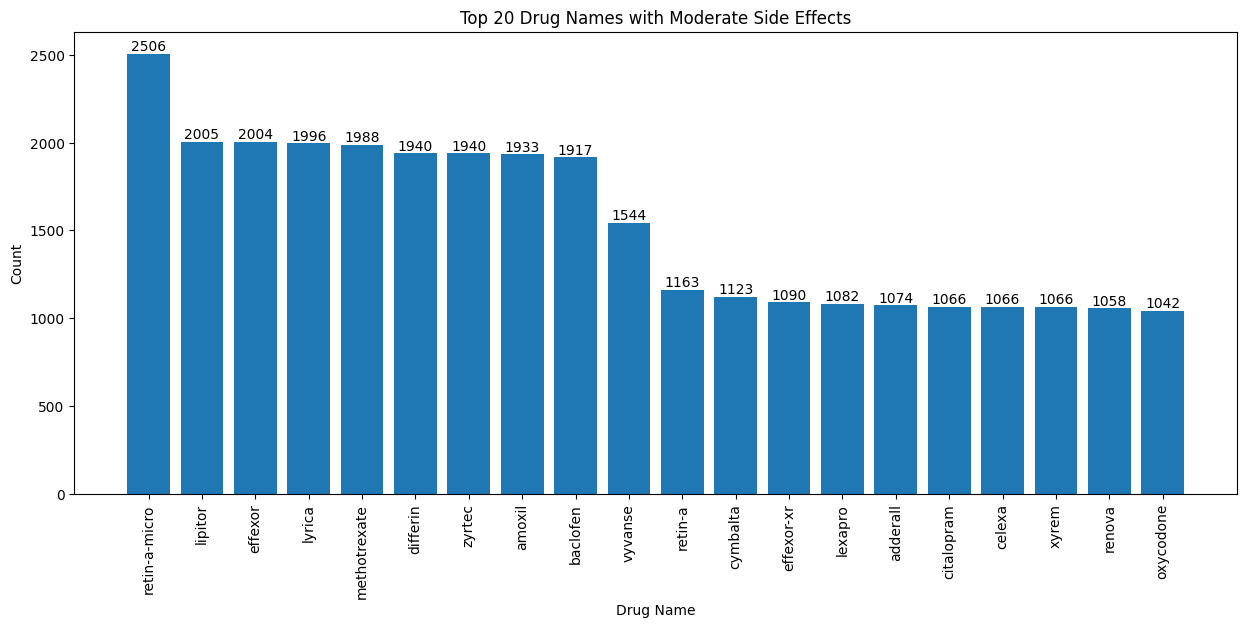

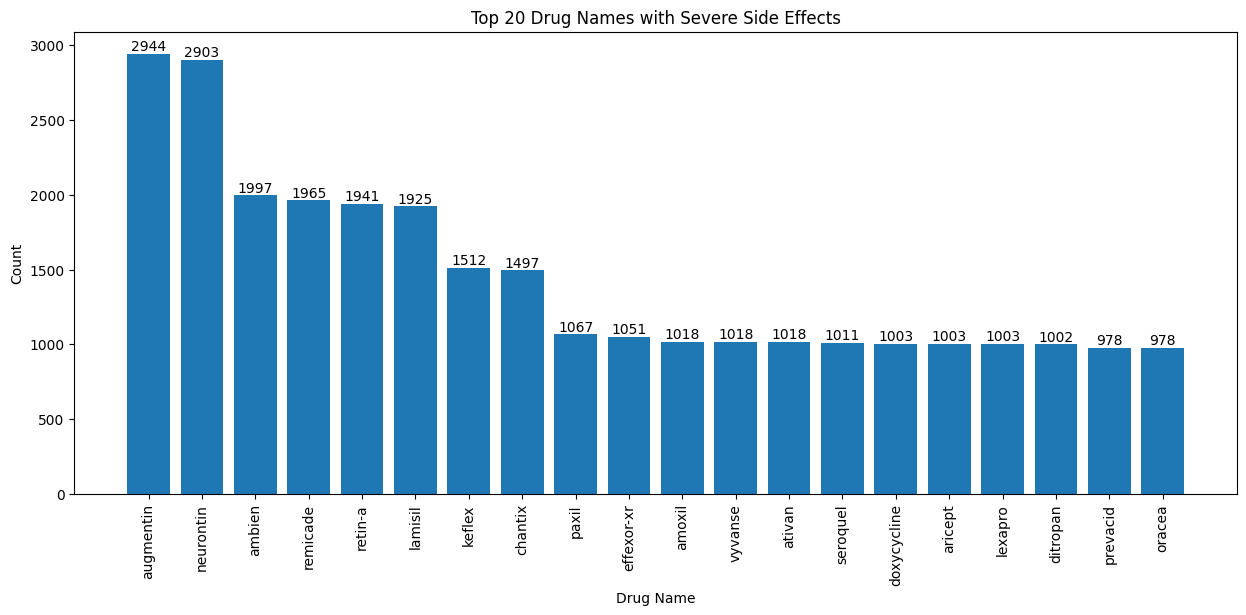

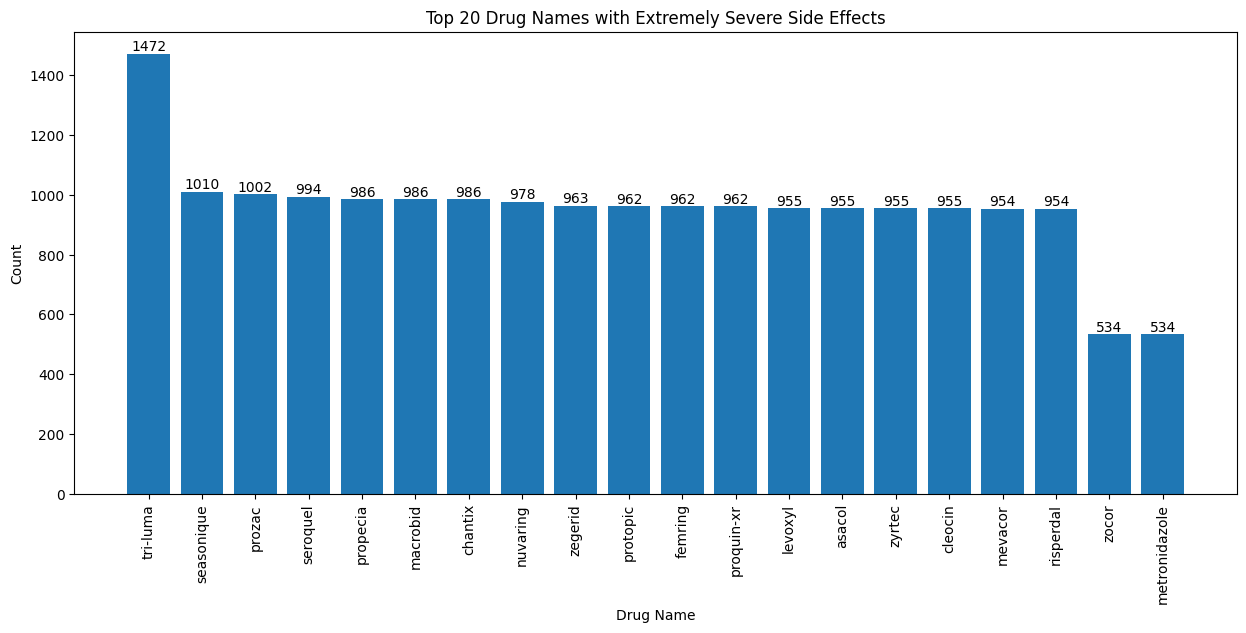

In [ ]:
# Define the side effect categories
side_effect_categories = ['Mild Side Effects', 'No Side Effects', 'Moderate Side Effects', 'Severe Side Effects', 'Extremely Severe Side Effects']

# Iterate over each side effect category
for category in side_effect_categories:
    # Filter the data for the specific side effect category
    filtered_data = data[data['SIDE EFFECTS'] == category]

    # Count the occurrences of each drug name
    drug_counts = filtered_data['DRUG NAME'].value_counts()

    # Sort the drug names based on the counts
    sorted_drugs = drug_counts.sort_values(ascending=False)

    # Select the top 20 drug names
    top_20_drugs = sorted_drugs.head(20)

    # Create a bar plot to display the top 20 drug names
    plt.figure(figsize=(15, 6))
    plt.bar(top_20_drugs.index, top_20_drugs.values)

    # Add labels and title
    plt.xlabel('Drug Name')
    plt.ylabel('Count')
    plt.title(f'Top 20 Drug Names with {category}')

    # Rotate x-axis labels if needed
    plt.xticks(rotation='vertical')

    # Add count values on top of each bar
    for i, value in enumerate(top_20_drugs.values):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Display the plot
    plt.show()

# **Data Preprocessing**

In [ ]:
data = data.drop('Age Range', axis=1)

In [ ]:
# Filter out ages outside the range of 100
filtered_data = data[data['AGE'] > 90]
print(len(filtered_data))


19


In [ ]:
# Print the output
filtered_data.head(20)

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
3008,Adaleen,F,biaxin,300.0,White,Severe Side Effects
41048,Bay,M,retin-a-micro,302.0,Black,Moderate Side Effects
66169,Charlotta,F,macrobid,500.0,White,Extremely Severe Side Effects
85047,Danyal,F,macrobid,400.0,White,Extremely Severe Side Effects
111850,Elizabeth,F,claritin,203.0,White,Severe Side Effects
119574,Ernie,M,wellbutrin,160.0,Black,Mild Side Effects
127240,Felicidad,F,ambien,400.0,Other,No Side Effects
171643,Javori,M,augmentin,191.0,"Hispanic, White",Severe Side Effects
174039,Jearld,M,cymbalta,450.0,White,Extremely Severe Side Effects
174487,Jehonadab,M,citalopram,390.0,White,Moderate Side Effects


In [ ]:
# Define a function to process the age values
def process_age(age):
    if age > 100:
        return int(age / 10)
    return age

# Apply the process_age function to the 'AGE' column in data
data['AGE'] = data['AGE'].apply(process_age)

# Print the corrected DataFrame
data.head()


,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [ ]:
# Filter out ages outside the range of 100
filtered_data = data[data['AGE'] > 90]
print(len(filtered_data))


0


In [ ]:
# Calculate the mean age
mean_age = data['AGE'].mean()

# Replace null values with the mean age
data['AGE'].fillna(mean_age, inplace=True)


In [ ]:
data.isnull().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

# **ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer

# Drop the 'NAME' column
data = data.drop('NAME', axis=1)

# Encode Categorical Variables
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['RACE'] = label_encoder.fit_transform(data['RACE'])
data['SIDE EFFECTS'] = label_encoder.fit_transform(data['SIDE EFFECTS'])

# Convert the 'DRUG NAME' column to a list of strings
drug_names = data['DRUG NAME'].tolist()

# Initialize the HashingVectorizer with the desired number of dimensions
hashing_vectorizer = HashingVectorizer(n_features=10, alternate_sign=False)

# Transform the drug names using the HashingVectorizer
hashed_features = hashing_vectorizer.transform(drug_names)

# Convert the hashed features to a dense NumPy array
hashed_features_array = hashed_features.toarray()

# Create a DataFrame with the hashed features
hashed_features_df = pd.DataFrame(hashed_features_array, columns=['DRUG_NAME_HASH_{}'.format(i+1) for i in range(10)])

# Concatenate the hashed features with the original data
data_encoded = pd.concat([data.drop('DRUG NAME', axis=1), hashed_features_df], axis=1)

In [ ]:
data_encoded.head()

,GENDER,AGE,RACE,SIDE EFFECTS,DRUG_NAME_HASH_1,DRUG_NAME_HASH_2,DRUG_NAME_HASH_3,DRUG_NAME_HASH_4,DRUG_NAME_HASH_5,DRUG_NAME_HASH_6,DRUG_NAME_HASH_7,DRUG_NAME_HASH_8,DRUG_NAME_HASH_9,DRUG_NAME_HASH_10
0,1,41.0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,53.0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,31.0,8,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,44.0,8,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,24.0,8,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split the data into features (X) and target (y)
X = data_encoded.drop('SIDE EFFECTS', axis=1)
y = data_encoded['SIDE EFFECTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Perform feature selection
feature_selector = SelectFromModel(model, threshold='median')
feature_selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

# Select the features in the training and testing data
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

In [ ]:
print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)


Selected Features:
AGE
RACE
DRUG_NAME_HASH_3
DRUG_NAME_HASH_4
DRUG_NAME_HASH_8
DRUG_NAME_HASH_9
DRUG_NAME_HASH_10


# **MODEL BUILDING**

In [ ]:
# Build the random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.667     0.681     0.674      4552
           1      0.868     0.885     0.877     26672
           2      0.838     0.772     0.804     15068
           3      0.846     0.857     0.851     23070
           4      0.804     0.823     0.814     10638

    accuracy                          0.836     80000
   macro avg      0.805     0.804     0.804     80000
weighted avg      0.836     0.836     0.836     80000



In [ ]:
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.717     0.648     0.681      4552
           1      0.865     0.874     0.869     26672
           2      0.771     0.818     0.794     15068
           3      0.855     0.836     0.845     23070
           4      0.805     0.787     0.796     10638

    accuracy                          0.828     80000
   macro avg      0.803     0.792     0.797     80000
weighted avg      0.828     0.828     0.828     80000



In [ ]:
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.33      0.45      4552
           1       0.62      0.82      0.71     26672
           2       0.70      0.53      0.60     15068
           3       0.71      0.74      0.73     23070
           4       0.78      0.55      0.64     10638

    accuracy                           0.68     80000
   macro avg       0.70      0.59      0.63     80000
weighted avg       0.69      0.68      0.67     80000



In [ ]:
# Build the Logistic Regression classifier model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4552
           1       0.39      0.51      0.44     26672
           2       0.32      0.12      0.17     15068
           3       0.38      0.64      0.48     23070
           4       0.00      0.00      0.00     10638

    accuracy                           0.38     80000
   macro avg       0.22      0.25      0.22     80000
weighted avg       0.30      0.38      0.32     80000



# **HYPER PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for K Neighbors Classifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2]}

# Create the K Neighbors Classifier model
model = KNeighborsClassifier()

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Create the model
model = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
#For min_samples_split, you are generating a sequence starting from 2, increasing by steps of 2,
# up to (but not including) 11. This results in the sequence [2, 4, 6, 8, 10].

#For min_samples_leaf, you are generating a sequence starting from 1, increasing by steps of 2,
#up to (but not including) 11. This results in the sequence [1, 3, 5, 7, 9]

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best Score: 0.83445625

# **CONCLUSION**

# Selected KNeighbors Classifier even though  RANDOM FORREST CLASSIFIER gave almost similar scores with an average accuracy,  precision, recall, f1-score (83%)